# Bike  Assignment
### Problem Statement:
---.A US bike-sharing provider BikeIndia has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

----.They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market.

----In such an attempt, BikeIndia aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


----.The company wants to know Which variables are significant in predicting the demand for shared bikes. How well those variables describe the bike demands Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.



## Business Goal:

----.You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# Step 1. Reading the file with help of libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
bike = pd.read_csv('day.csv')
bike.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [3]:
bike.shape

(730, 16)

In [4]:
bike.size

11680

In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


###### Insights :
 .The given dataset has 730 rowns and 16 columns.

 .Except 'dteday' whose dtype is object (contains date type info), all other are either float or integer type.

 .No null/missing values found in the dataset and Some columns that are categorical in nature, but in integer/float type.


In [6]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
bike.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [9]:
bike.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [10]:
bike.rename(columns={'yr':'year','mnth':'month','hum':'humidity'},inplace=True)

In [11]:
bike.head()

instant      dteday  season  year  month  holiday  weekday  workingday  \
0        1  01-01-2018       1     0      1        0        1           1   
1        2  02-01-2018       1     0      1        0        2           1   
2        3  03-01-2018       1     0      1        0        3           1   
3        4  04-01-2018       1     0      1        0        4           1   
4        5  05-01-2018       1     0      1        0        5           1   

   weathersit       temp     atemp  humidity  windspeed  casual  registered  \
0           2  14.110847  18.18125   80.5833  10.749882     331         654   
1           2  14.902598  17.68695   69.6087  16.652113     131         670   
2           1   8.050924   9.47025   43.7273  16.636703     120        1229   
3           1   8.200000  10.60610   59.0435  10.739832     108        1454   
4           1   9.305237  11.46350   43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

## Dropping irrevelent  columns

In [12]:
# instant column will drop because it contains index values which are not required.
# we have already month and year so we don't need dteday.
# target variable 'cnt' so drop casual and registered.
bike.drop(['instant'], axis =1, inplace=True)
bike.drop(['dteday'],axis=1, inplace =True)
bike.drop(['casual','registered'],axis=1, inplace = True)

In [13]:
bike.shape

(730, 12)

In [14]:
#Encoding /mapping columns of season
bike.season = bike.season.map({1:'spring',2:'summer',3:'fall',4:'winter'})

In [15]:
#Encoding /mapping columns of weathersit
bike.weathersit = bike.weathersit.map({1:'Clear',2:'Mist',3:'Light_Snowrain',4:'Heavy_Rain'})


In [16]:
# Encoding /mapping of mnth
bike.month = bike.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sept',10:'oct',11:'nov',12:'dec'})


In [17]:
# Encodding /mapping of weekday
bike.weekday = bike.weekday.map({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})

In [18]:
bike.head()

season  year month  holiday weekday  workingday weathersit       temp  \
0  spring     0   jan        0     mon           1       Mist  14.110847   
1  spring     0   jan        0     tue           1       Mist  14.902598   
2  spring     0   jan        0     wed           1      Clear   8.050924   
3  spring     0   jan        0     thu           1      Clear   8.200000   
4  spring     0   jan        0     fri           1      Clear   9.305237   

      atemp  humidity  windspeed   cnt  
0  18.18125   80.5833  10.749882   985  
1  17.68695   69.6087  16.652113   801  
2   9.47025   43.7273  16.636703  1349  
3  10.60610   59.0435  10.739832  1562  
4  11.46350   43.6957  12.522300  1600

In [19]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


#  Step 2. visualize the data

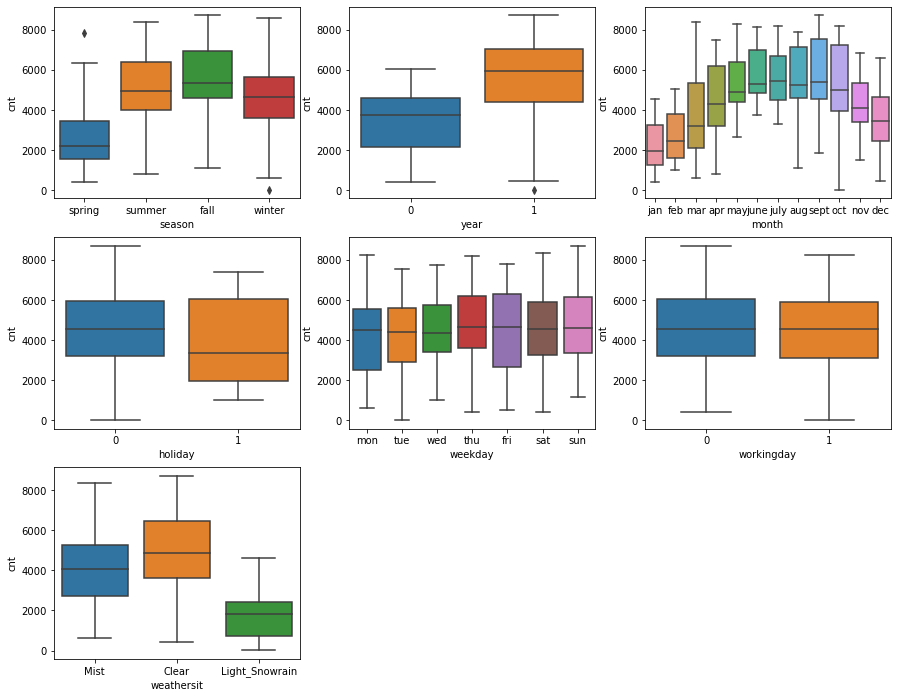

In [20]:
# Boxplot for categorical variables
plt.figure(figsize=(15,12))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data =bike)
plt.subplot(3,3,2)
sns.boxplot(x='year',y ='cnt',data = bike)
plt.subplot(3,3,3)
sns.boxplot(x='month',y='cnt',data=bike)
plt.subplot(3,3,4)
sns.boxplot(x='holiday',y ='cnt',data=bike)
plt.subplot(3,3,5)
sns.boxplot(x='weekday',y ='cnt',data=bike)
plt.subplot(3,3,6)
sns.boxplot(x='workingday',y ='cnt',data=bike)
plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y ='cnt',data=bike)
plt.show()

###### insights:
.Season: 3:fall has highest demand for rental bikes.

. Demand is continuously growing each month till June. September month has highest demand. After September, demand is        decreasing.

.When there is a holiday, demand has decreased.

. Weekday is not giving clear picture abount demand.

. The clear weathershit has highest demand.

. During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme               weather conditions.

In [21]:
# function to create barplot related to categorical columns
def pairplotcate(columns):
    plt.figure(figsize =(12,6))
    plt.subplot(1,2,1)
    sns.barplot(columns,'cnt',data = bike)
    plt.subplot(1,2,2)
    sns.barplot(columns,'cnt',data = bike, hue = 'year',palette='Set1')
    plt.legend(labels = ['2018','2019'])
    plt.legend()
    plt.show()


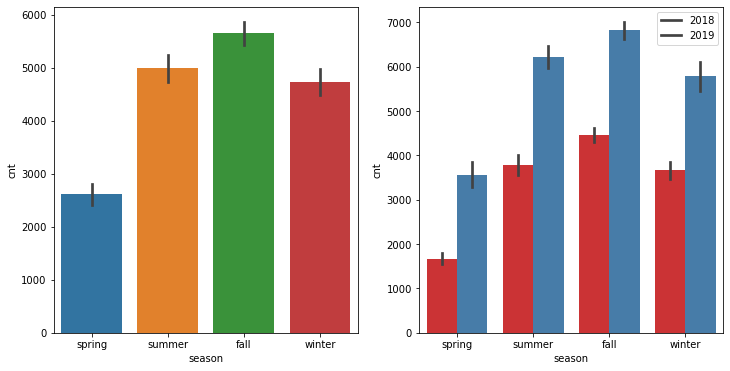

In [22]:
# plotting visualization for season column
pairplotcate('season')

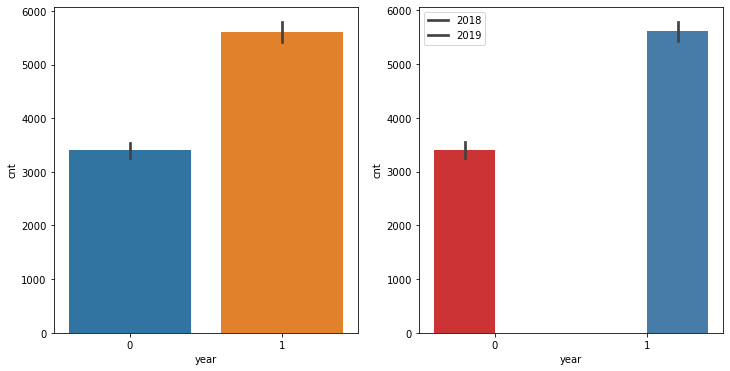

In [23]:
# plotting visualization for year column
pairplotcate('year')

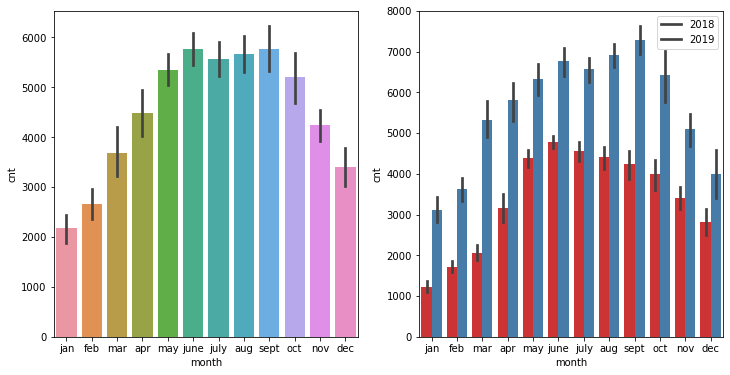

In [24]:
# plotting visualization for month column
pairplotcate('month')

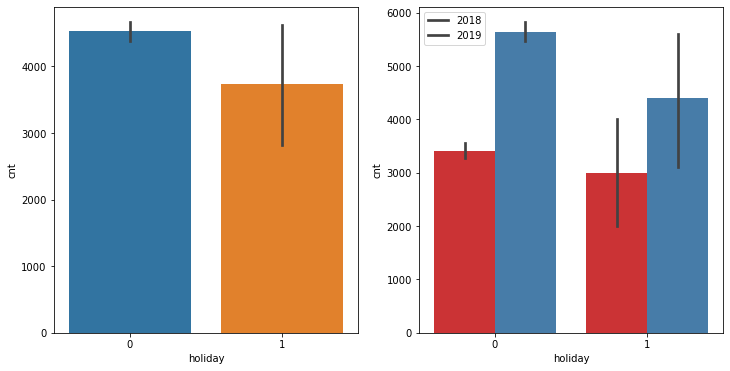

In [25]:
# plotting visualization for holiday column
pairplotcate('holiday')

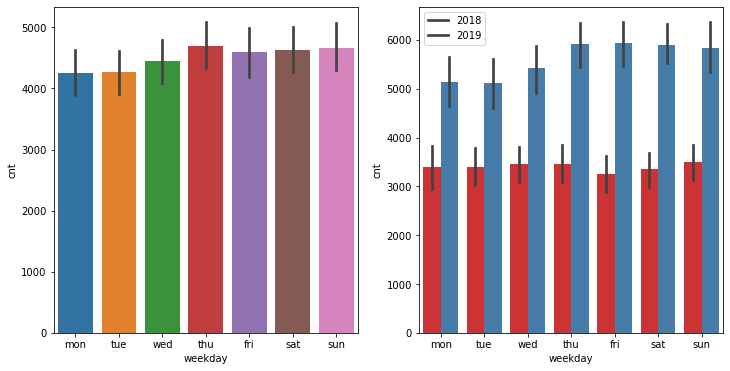

In [26]:
# plotting visualization for weekday column
pairplotcate('weekday')

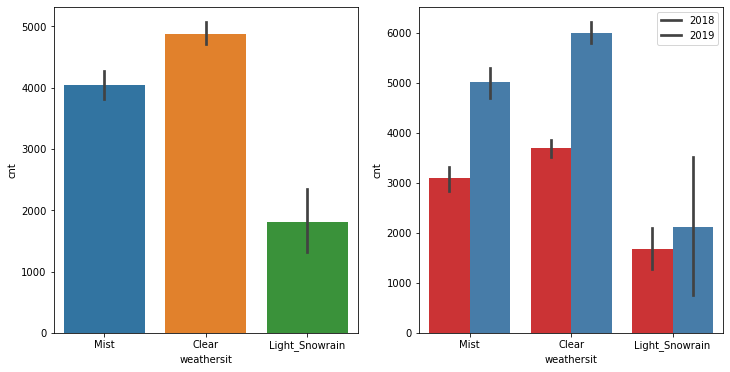

In [27]:
# plotting visualization for weathersit column
pairplotcate('weathersit')

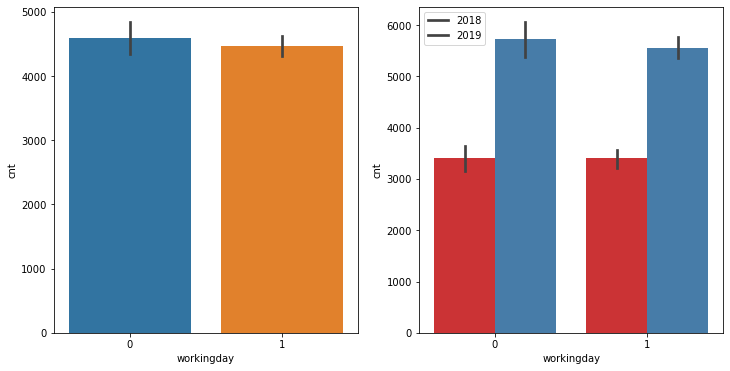

In [28]:
# plotting visualization for workingday column
pairplotcate('workingday')

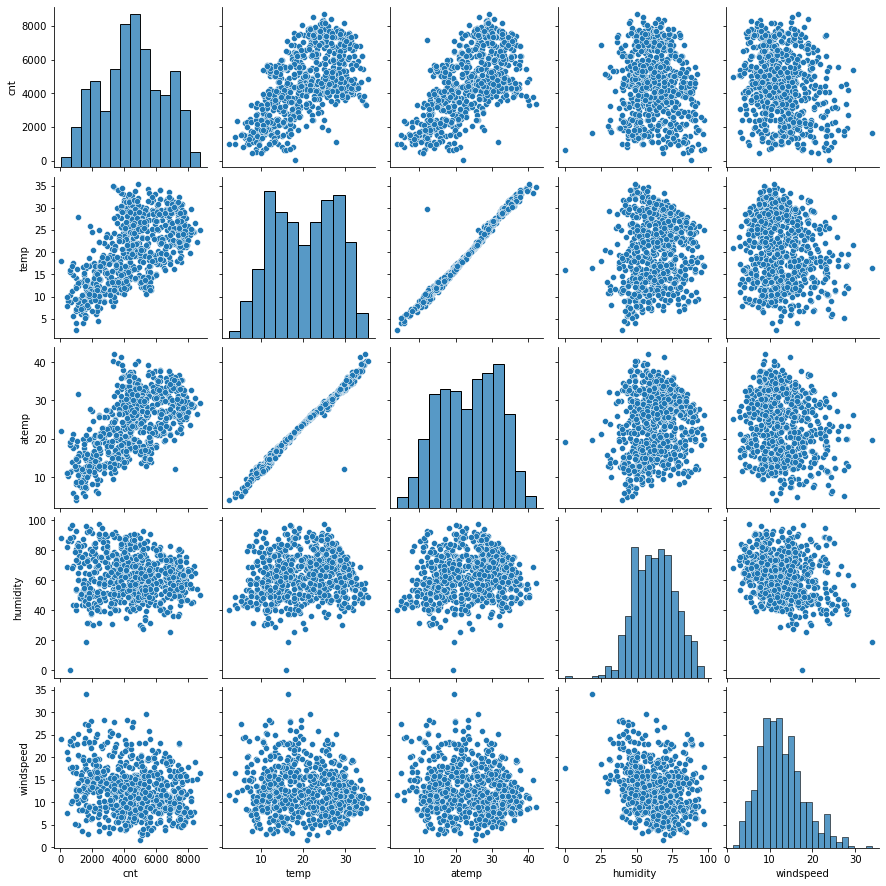

In [29]:
# visualize the numerical variable by pairplot
sns.pairplot(bike ,vars = ['cnt','temp','atemp','humidity','windspeed'])
plt.show()

###### Insights:
 .temp and atemp are highly co-related with each other.
 
 .temp and atemp has the highest corelation with the target variable cnt.

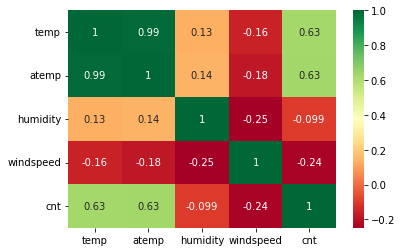

In [30]:
# Checking the correlation between the numerical variables
sns.heatmap(bike[['temp','atemp','humidity','windspeed','cnt']].corr(),cmap="RdYlGn", annot=True)
plt.show()


<Figure size 1440x1080 with 0 Axes>

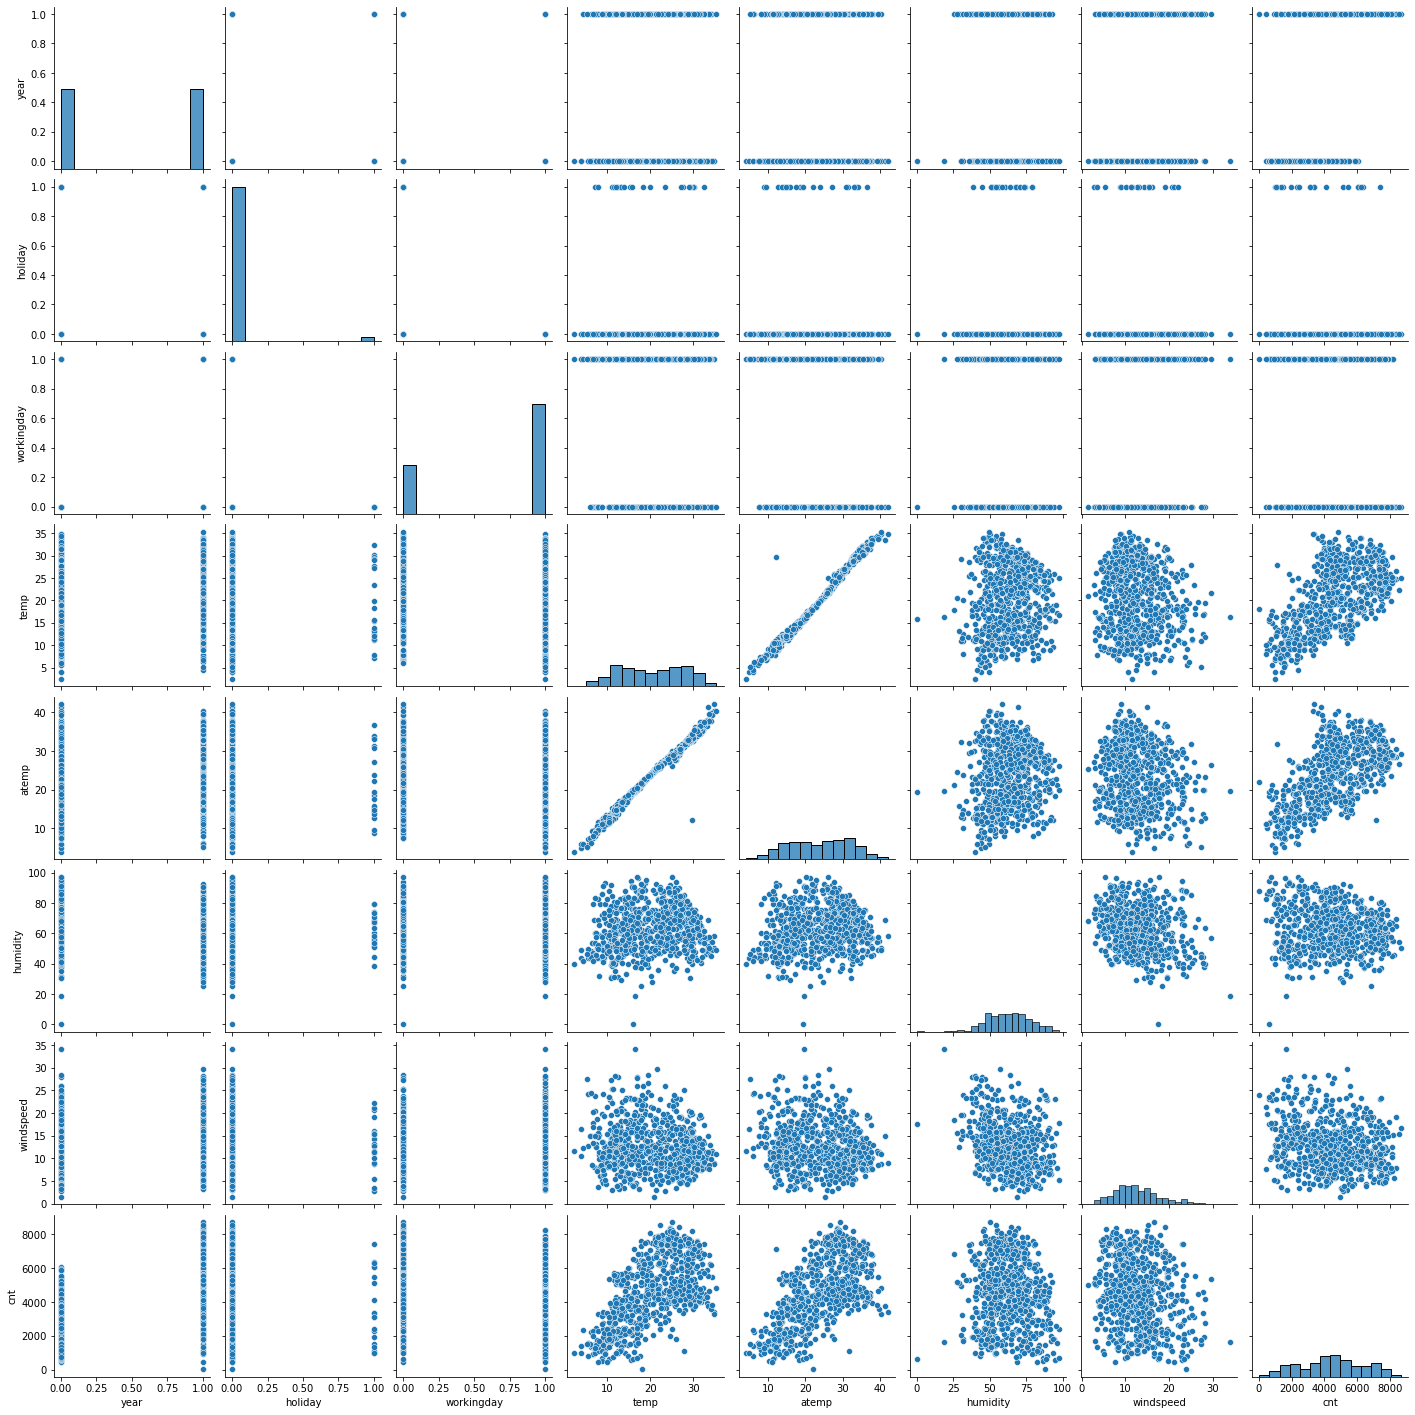

In [31]:
# Correlation between numerical variables
plt.figure(figsize=(20,15))
sns.pairplot(bike)
plt.show()

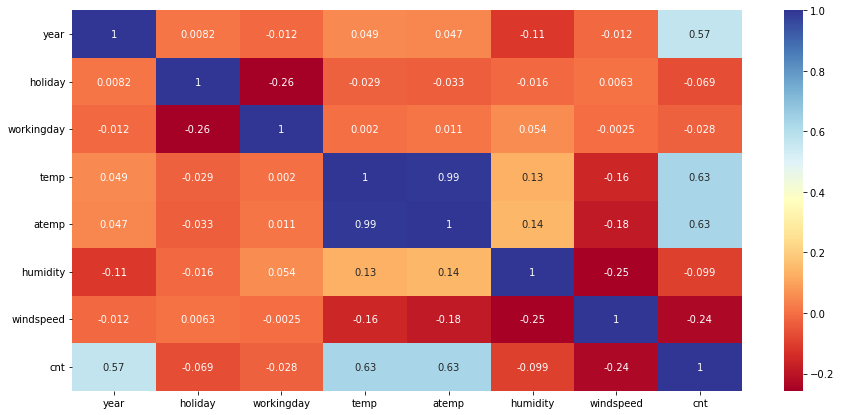

In [32]:
# correlations between variables
plt.figure(figsize = (15,7))
sns.heatmap(bike.corr(),cmap='RdYlBu',annot =True)
plt.show()


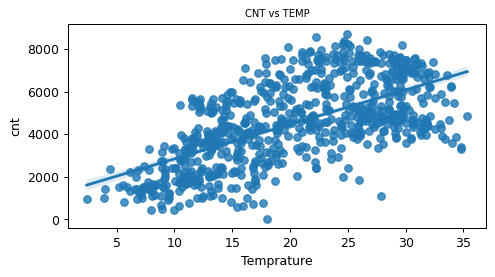

In [33]:
plt.figure(figsize=(6,3),dpi=90)
plt.title("CNT vs TEMP",fontsize=8)
sns.regplot(x='temp',y='cnt',data=bike)
plt.xlabel('Temprature')
plt.show()

###### insight:
.Bikes is positively correlated to temp and cnt is linearly increasing with temp indicating linear relation.



# Step 3. Data prepration for linear regression

In [34]:
# Converting into object
bike['season']=bike['season'].astype('category')
bike['month']=bike['month'].astype('category')
bike['weekday']=bike['weekday'].astype('category')
bike['weathersit']=bike['weathersit'].astype('category')

In [35]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   year        730 non-null    int64   
 2   month       730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   humidity    730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [36]:
bike['season'].head()

0    spring
1    spring
2    spring
3    spring
4    spring
Name: season, dtype: category
Categories (4, object): ['fall', 'spring', 'summer', 'winter']

In [37]:
bike['month'].head()

0    jan
1    jan
2    jan
3    jan
4    jan
Name: month, dtype: category
Categories (12, object): ['apr', 'aug', 'dec', 'feb', ..., 'may', 'nov', 'oct', 'sept']

In [38]:
bike['weathersit'].head()

0     Mist
1     Mist
2    Clear
3    Clear
4    Clear
Name: weathersit, dtype: category
Categories (3, object): ['Clear', 'Light_Snowrain', 'Mist']

In [39]:
bike['weekday'].head()

0    mon
1    tue
2    wed
3    thu
4    fri
Name: weekday, dtype: category
Categories (7, object): ['fri', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed']

###### Create  Dummy variables with Categorical  columns:

In [40]:
# creating dummy variables of categorical variables with 4 categorial columns 'season','month','weekday','weathersit'.
Season = pd.get_dummies(bike['season'],drop_first = True)
Month = pd.get_dummies(bike['month'],drop_first = True)
Weekday = pd.get_dummies(bike['weekday'],drop_first = True)
Weathersit = pd.get_dummies(bike['weathersit'],drop_first=True)

In [41]:
bike.head()

season  year month  holiday weekday  workingday weathersit       temp  \
0  spring     0   jan        0     mon           1       Mist  14.110847   
1  spring     0   jan        0     tue           1       Mist  14.902598   
2  spring     0   jan        0     wed           1      Clear   8.050924   
3  spring     0   jan        0     thu           1      Clear   8.200000   
4  spring     0   jan        0     fri           1      Clear   9.305237   

      atemp  humidity  windspeed   cnt  
0  18.18125   80.5833  10.749882   985  
1  17.68695   69.6087  16.652113   801  
2   9.47025   43.7273  16.636703  1349  
3  10.60610   59.0435  10.739832  1562  
4  11.46350   43.6957  12.522300  1600

In [42]:
Season.head()

spring  summer  winter
0       1       0       0
1       1       0       0
2       1       0       0
3       1       0       0
4       1       0       0

In [43]:
Month.head()

aug  dec  feb  jan  july  june  mar  may  nov  oct  sept
0    0    0    0    1     0     0    0    0    0    0     0
1    0    0    0    1     0     0    0    0    0    0     0
2    0    0    0    1     0     0    0    0    0    0     0
3    0    0    0    1     0     0    0    0    0    0     0
4    0    0    0    1     0     0    0    0    0    0     0

In [44]:
Weekday.head()

mon  sat  sun  thu  tue  wed
0    1    0    0    0    0    0
1    0    0    0    0    1    0
2    0    0    0    0    0    1
3    0    0    0    1    0    0
4    0    0    0    0    0    0

In [45]:
Weathersit.head()

Light_Snowrain  Mist
0               0     1
1               0     1
2               0     0
3               0     0
4               0     0

In [46]:
# Add the dummy variables to the original dataframe
bike1 = pd.concat([bike,Season,Month,Weekday,Weathersit],axis=1)


In [47]:
bike1.head()

season  year month  holiday weekday  workingday weathersit       temp  \
0  spring     0   jan        0     mon           1       Mist  14.110847   
1  spring     0   jan        0     tue           1       Mist  14.902598   
2  spring     0   jan        0     wed           1      Clear   8.050924   
3  spring     0   jan        0     thu           1      Clear   8.200000   
4  spring     0   jan        0     fri           1      Clear   9.305237   

      atemp  humidity  windspeed   cnt  
0  18.18125   80.5833  10.749882   985  
1  17.68695   69.6087  16.652113   801  
2   9.47025   43.7273  16.636703  1349  
3  10.60610   59.0435  10.739832  1562  
4  11.46350   43.6957  12.522300  1600

In [48]:
bike1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   season          730 non-null    category
 1   year            730 non-null    int64   
 2   month           730 non-null    category
 3   holiday         730 non-null    int64   
 4   weekday         730 non-null    category
 5   workingday      730 non-null    int64   
 6   weathersit      730 non-null    category
 7   temp            730 non-null    float64 
 8   atemp           730 non-null    float64 
 9   humidity        730 non-null    float64 
 10  windspeed       730 non-null    float64 
 11  cnt             730 non-null    int64   
 12  spring          730 non-null    uint8   
 13  summer          730 non-null    uint8   
 14  winter          730 non-null    uint8   
 15  aug             730 non-null    uint8   
 16  dec             730 non-null    uint8   
 17  feb             

In [49]:
# dropping some variable we have already created dummy variable by these variables.
bike1.drop(['season','month','weekday','weathersit'],axis=1,inplace=True)

In [50]:
bike1.head()

year  holiday  workingday       temp     atemp  humidity  windspeed   cnt  \
0     0        0           1  14.110847  18.18125   80.5833  10.749882   985   
1     0        0           1  14.902598  17.68695   69.6087  16.652113   801   
2     0        0           1   8.050924   9.47025   43.7273  16.636703  1349   
3     0        0           1   8.200000  10.60610   59.0435  10.739832  1562   
4     0        0           1   9.305237  11.46350   43.6957  12.522300  1600   

   spring  summer  ...  oct  sept  mon  sat  sun  thu  tue  wed  \
0       1       0  ...    0     0    1    0    0    0    0    0   
1       1       0  ...    0     0    0    0    0    0    1    0   
2       1       0  ...    0     0    0    0    0    0    0    1   
3       1       0  ...    0     0    0    0    0    1    0    0   
4       1       0  ...    0     0    0    0    0    0    0    0   

   Light_Snowrain  Mist  
0               0     1  
1               0     1  
2               0     0  
3               0     0  
4               0     0  

[5 rows x 30 columns]

In [51]:
bike1.shape

(730, 30)

In [52]:
bike1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   spring          730 non-null    uint8  
 9   summer          730 non-null    uint8  
 10  winter          730 non-null    uint8  
 11  aug             730 non-null    uint8  
 12  dec             730 non-null    uint8  
 13  feb             730 non-null    uint8  
 14  jan             730 non-null    uint8  
 15  july            730 non-null    uint8  
 16  june            730 non-null    uint8  
 17  mar             730 non-null    uin

# Step 4.Splitting the data
-----Train:Test in 70:30 ratio

In [53]:
np.random.seed(0)
df_train,df_test = train_test_split(bike1,train_size=0.7,test_size=0.3,random_state =100)

In [54]:
df_train.head()

year  holiday  workingday       temp    atemp  humidity  windspeed   cnt  \
653     1        0           1  19.201653  23.0423   55.8333  12.208807  7534   
576     1        0           1  29.246653  33.1448   70.4167  11.083475  7216   
426     1        0           0  16.980847  20.6746   62.1250  10.792293  4066   
728     1        0           1  10.489153  11.5850   48.3333  23.500518  1796   
482     1        0           0  15.443347  18.8752   48.9583   8.708325  4220   

     spring  summer  ...  oct  sept  mon  sat  sun  thu  tue  wed  \
653       0       0  ...    1     0    0    0    0    0    0    1   
576       0       0  ...    0     0    0    0    0    0    0    1   
426       1       0  ...    0     0    0    0    1    0    0    0   
728       1       0  ...    0     0    1    0    0    0    0    0   
482       0       1  ...    0     0    0    0    1    0    0    0   

     Light_Snowrain  Mist  
653               0     0  
576               0     0  
426               0     1  
728               0     0  
482               0     1  

[5 rows x 30 columns]

In [55]:
df_train.shape

(510, 30)

In [56]:
df_train.size

15300

In [57]:
df_test.shape

(219, 30)

In [58]:
df_test.size

6570

In [59]:
df_train.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'cnt', 'spring', 'summer', 'winter', 'aug', 'dec', 'feb',
       'jan', 'july', 'june', 'mar', 'may', 'nov', 'oct', 'sept', 'mon', 'sat',
       'sun', 'thu', 'tue', 'wed', 'Light_Snowrain', 'Mist'],
      dtype='object')

In [60]:
df_test.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'cnt', 'spring', 'summer', 'winter', 'aug', 'dec', 'feb',
       'jan', 'july', 'june', 'mar', 'may', 'nov', 'oct', 'sept', 'mon', 'sat',
       'sun', 'thu', 'tue', 'wed', 'Light_Snowrain', 'Mist'],
      dtype='object')

##### Rescaling the Features
1.Min-Max scaling

2.Standardisation (mean-0, sigma-1)

In [61]:
# min-max scaling

scaler=MinMaxScaler()

In [62]:
# checking data before scaling
df_train.head()

year  holiday  workingday       temp    atemp  humidity  windspeed   cnt  \
653     1        0           1  19.201653  23.0423   55.8333  12.208807  7534   
576     1        0           1  29.246653  33.1448   70.4167  11.083475  7216   
426     1        0           0  16.980847  20.6746   62.1250  10.792293  4066   
728     1        0           1  10.489153  11.5850   48.3333  23.500518  1796   
482     1        0           0  15.443347  18.8752   48.9583   8.708325  4220   

     spring  summer  ...  oct  sept  mon  sat  sun  thu  tue  wed  \
653       0       0  ...    1     0    0    0    0    0    0    1   
576       0       0  ...    0     0    0    0    0    0    0    1   
426       1       0  ...    0     0    0    0    1    0    0    0   
728       1       0  ...    0     0    1    0    0    0    0    0   
482       0       1  ...    0     0    0    0    1    0    0    0   

     Light_Snowrain  Mist  
653               0     0  
576               0     0  
426               0     1  
728               0     0  
482               0     1  

[5 rows x 30 columns]

In [63]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
numvar = ['atemp','temp', 'humidity', 'windspeed','cnt']
df_train[numvar] = scaler.fit_transform(df_train[numvar])

In [64]:
# checking data after scaling
df_train.head()

year  holiday  workingday      temp     atemp  humidity  windspeed  \
653     1        0           1  0.509887  0.501133  0.575354   0.300794   
576     1        0           1  0.815169  0.766351  0.725633   0.264686   
426     1        0           0  0.442393  0.438975  0.640189   0.255342   
728     1        0           1  0.245101  0.200348  0.498067   0.663106   
482     1        0           0  0.395666  0.391735  0.504508   0.188475   

          cnt  spring  summer  ...  oct  sept  mon  sat  sun  thu  tue  wed  \
653  0.864243       0       0  ...    1     0    0    0    0    0    0    1   
576  0.827658       0       0  ...    0     0    0    0    0    0    0    1   
426  0.465255       1       0  ...    0     0    0    0    1    0    0    0   
728  0.204096       1       0  ...    0     0    1    0    0    0    0    0   
482  0.482973       0       1  ...    0     0    0    0    1    0    0    0   

     Light_Snowrain  Mist  
653               0     0  
576               0     0  
426               0     1  
728               0     0  
482               0     1  

[5 rows x 30 columns]

In [65]:
df_train.describe()

year     holiday  workingday        temp       atemp    humidity  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.711765    0.537262    0.512989    0.650369   
std      0.500429    0.157763    0.453386    0.225844    0.212385    0.145882   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.332086    0.538643   
50%      1.000000    0.000000    1.000000    0.540519    0.526811    0.653714   
75%      1.000000    0.000000    1.000000    0.735215    0.688457    0.754830   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed         cnt      spring      summer  ...         oct  \
count  510.000000  510.000000  510.000000  510.000000  ...  510.000000   
mean     0.320768    0.513620    0.243137    0.245098  ...    0.086275   
std      0.169797    0.224593    0.429398    0.430568  ...    0.281045   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.199179    0.356420    0.000000    0.000000  ...    0.000000   
50%      0.296763    0.518638    0.000000    0.000000  ...    0.000000   
75%      0.414447    0.684710    0.000000    0.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

             sept         mon         sat         sun         thu         tue  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.080392    0.154902    0.129412    0.137255    0.143137    0.152941   
std      0.272166    0.362166    0.335985    0.344454    0.350557    0.360284   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              wed  Light_Snowrain        Mist  
count  510.000000      510.000000  510.000000  
mean     0.135294        0.029412    0.343137  
std      0.342373        0.169124    0.475223  
min      0.000000        0.000000    0.000000  
25%      0.000000        0.000000    0.000000  
50%      0.000000        0.000000    0.000000  
75%      0.000000        0.000000    1.000000  
max      1.000000        1.000000    1.000000  

[8 rows x 30 columns]

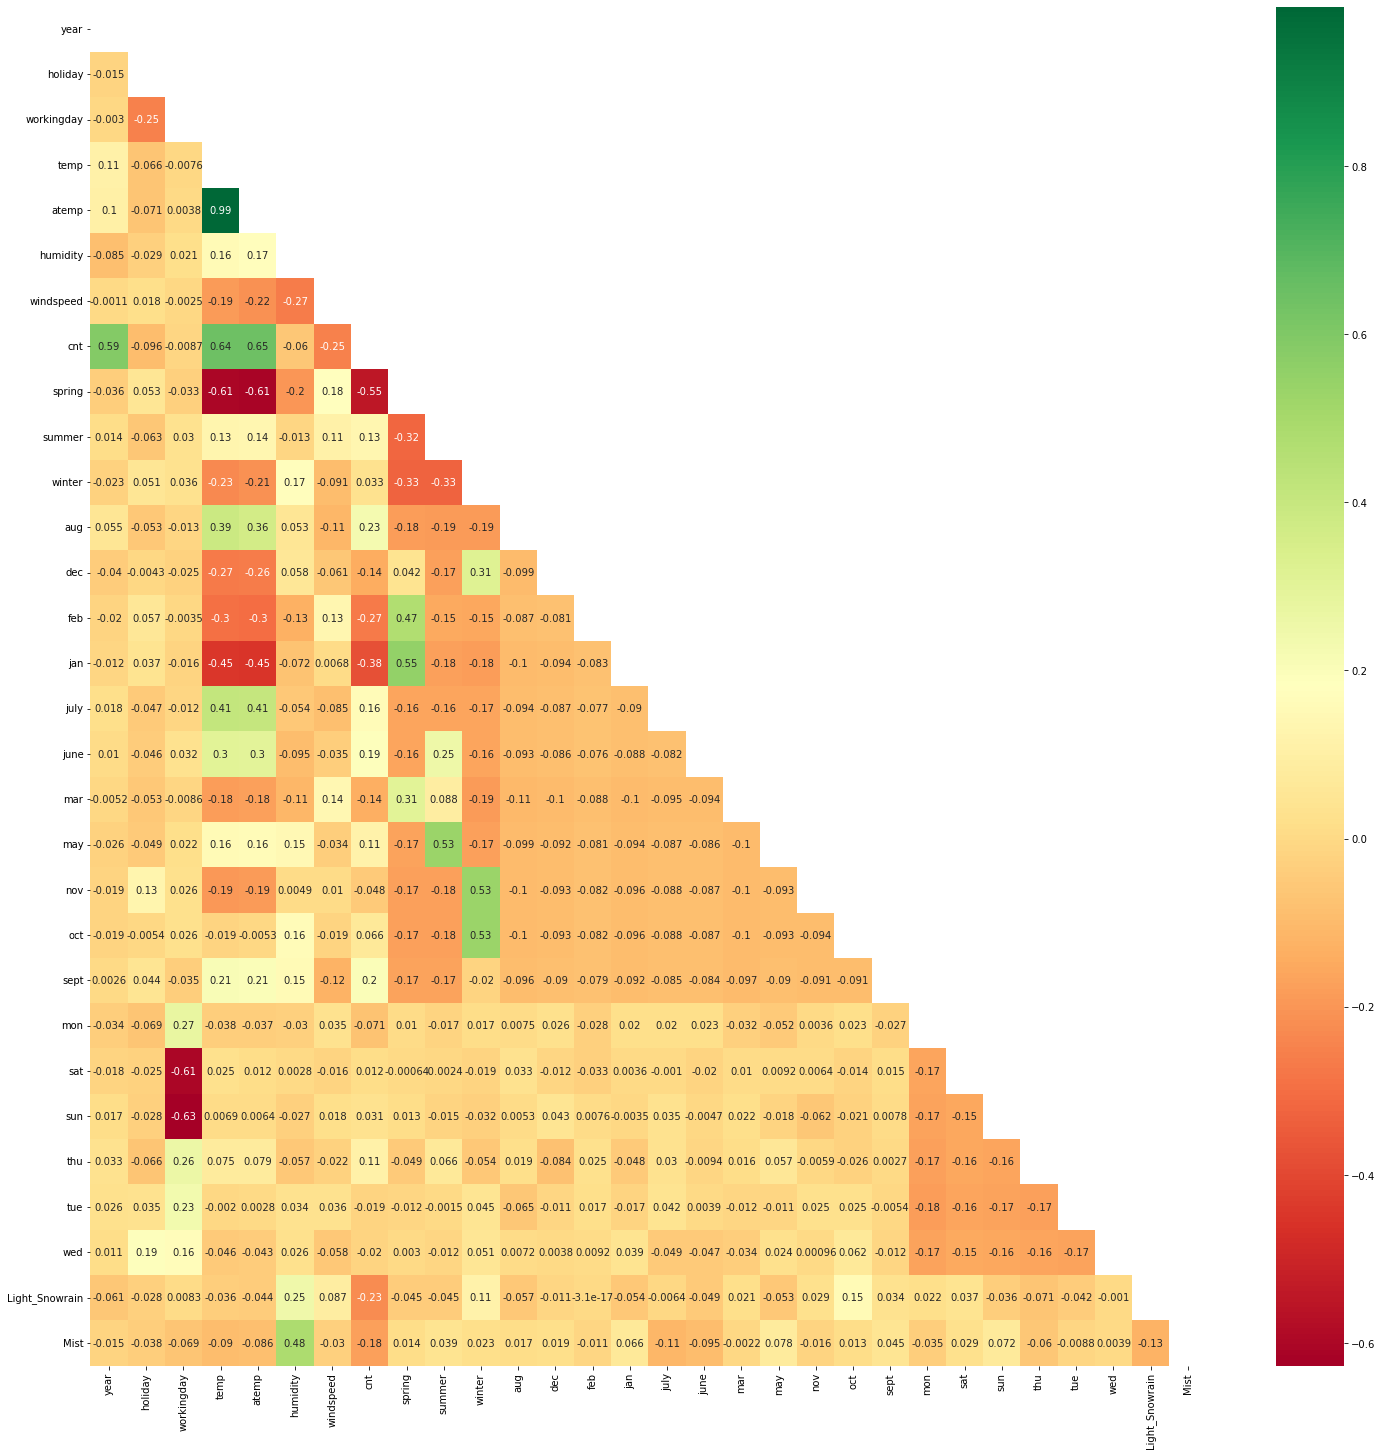

In [66]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize=(25,25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(),annot=True,cmap="RdYlGn",mask = matrix)
plt.show()

#### insights:
--cnt seems to have correlation with year variable and temp. Similarly, Misty and humidity show correlation. Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.

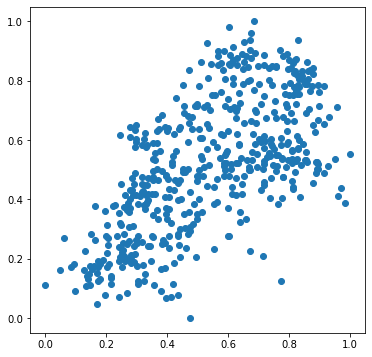

In [67]:
# Visualizing  the correlation by Scatter plot.
plt.figure(figsize = (6,6))
plt.scatter(df_train.temp,df_train.cnt)
plt.show()

### Dividing into X and Y sets for the model building

In [68]:
y_train = df_train.pop('cnt')
X_train = df_train

In [69]:
X_train.shape

(510, 29)

## Importing REF library

In [70]:
lm = LinearRegression()
lm.fit(X_train,y_train)

# Running RFE with the output number of the variable equal to 15
rfe = RFE(lm,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [71]:
#List of variables selected in top 15 list.
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 15),
 ('may', False, 7),
 ('nov', True, 1),
 ('oct', False, 12),
 ('sept', True, 1),
 ('mon', False, 9),
 ('sat', False, 4),
 ('sun', False, 5),
 ('thu', False, 13),
 ('tue', False, 8),
 ('wed', False, 11),
 ('Light_Snowrain', True, 1),
 ('Mist', True, 1)]

In [72]:
# selecting the selected variable via RFE in col list
colo = X_train.columns[rfe.support_]
print(colo)

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'spring', 'summer',
       'winter', 'dec', 'jan', 'july', 'nov', 'sept', 'Light_Snowrain',
       'Mist'],
      dtype='object')


In [73]:
# checking  variable which  are not in columns.
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'aug', 'feb', 'june', 'mar', 'may', 'oct', 'mon',
       'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [74]:
# dataframe with RFE selected variables

X_train_rfe = X_train[colo]

In [75]:
X_train_rfe.columns

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'spring', 'summer',
       'winter', 'dec', 'jan', 'july', 'nov', 'sept', 'Light_Snowrain',
       'Mist'],
      dtype='object')

# Step 5: Building a linear model


In [76]:
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [77]:
calculateVIF(X_train_rfe)

Features    VIF
3         humidity  30.94
2             temp  17.80
4        windspeed   4.72
5           spring   4.37
7           winter   4.06
6           summer   2.81
14            Mist   2.32
0             year   2.09
11             nov   1.83
9              jan   1.75
10            july   1.59
8              dec   1.55
12            sept   1.41
13  Light_Snowrain   1.28
1          holiday   1.06

In [78]:
X_train_rfe.head()

year  holiday      temp  humidity  windspeed  spring  summer  winter  \
653     1        0  0.509887  0.575354   0.300794       0       0       1   
576     1        0  0.815169  0.725633   0.264686       0       0       0   
426     1        0  0.442393  0.640189   0.255342       1       0       0   
728     1        0  0.245101  0.498067   0.663106       1       0       0   
482     1        0  0.395666  0.504508   0.188475       0       1       0   

     dec  jan  july  nov  sept  Light_Snowrain  Mist  
653    0    0     0    0     0               0     0  
576    0    0     1    0     0               0     0  
426    0    0     0    0     0               0     1  
728    1    0     0    0     0               0     0  
482    0    0     0    0     0               0     1

### Model 1

In [79]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 27 Jun 2022   Prob (F-statistic):          3.34e-189
Time:                        12:43:40   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3202      0.036      8.

In [80]:
# dropping variable "hum" due to very high vif and re-process the model
X_train_new=X_train_rfe.drop(['humidity'],axis=1)

In [81]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

Features   VIF
2             temp  5.17
3        windspeed  4.67
6           winter  2.94
4           spring  2.89
5           summer  2.23
0             year  2.07
10             nov  1.80
8              jan  1.66
9             july  1.59
13            Mist  1.56
7              dec  1.46
11            sept  1.35
12  Light_Snowrain  1.09
1          holiday  1.06

### Model 2

In [82]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Mon, 27 Jun 2022   Prob (F-statistic):          1.57e-186
Time:                        12:43:40   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2466      0.032      7.

In [83]:
# We can drop nov variable as it has high p-value
X_train_new = X_train_new.drop(['summer'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

Features   VIF
2             temp  4.67
3        windspeed  4.05
5           winter  2.54
4           spring  2.36
0             year  2.06
9              nov  1.80
7              jan  1.65
12            Mist  1.53
6              dec  1.46
8             july  1.36
10            sept  1.21
11  Light_Snowrain  1.09
1          holiday  1.06

### Model 3

In [84]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Mon, 27 Jun 2022   Prob (F-statistic):          1.08e-186
Time:                        12:43:40   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     496   BIC:                            -919.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2893      0.025     11.

In [85]:
# We can drop dec variable as it has high p-value
X_train_new = X_train_new.drop(['nov'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

Features   VIF
2             temp  4.63
3        windspeed  4.00
4           spring  2.36
0             year  2.06
5           winter  1.64
7              jan  1.64
11            Mist  1.53
8             july  1.36
6              dec  1.29
9             sept  1.20
10  Light_Snowrain  1.08
1          holiday  1.04

### Model 4

In [86]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Mon, 27 Jun 2022   Prob (F-statistic):          2.02e-186
Time:                        12:43:40   Log-Likelihood:                 499.81
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     497   BIC:                            -918.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2769      0.025     11.

In [87]:
# We can drop jan variable as it has high p-value
X_train_new = X_train_new.drop(['dec'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

Features   VIF
2             temp  4.63
3        windspeed  4.00
4           spring  2.25
0             year  2.06
6              jan  1.60
10            Mist  1.53
5           winter  1.40
7             july  1.36
8             sept  1.20
9   Light_Snowrain  1.08
1          holiday  1.04

### Model 5

In [88]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.7
Date:                Mon, 27 Jun 2022   Prob (F-statistic):          1.13e-186
Time:                        12:43:41   Log-Likelihood:                 497.58
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     498   BIC:                            -920.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2657      0.025     10.

In [89]:
# We can drop july variable as it has high p-value
X_train_new = X_train_new.drop(['jan'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

Features   VIF
2            temp  4.60
3       windspeed  4.00
0            year  2.06
4          spring  1.65
9            Mist  1.51
5          winter  1.40
6            july  1.35
7            sept  1.20
8  Light_Snowrain  1.08
1         holiday  1.04

### Model 6

In [90]:
# Building 6th linear regression model

X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Mon, 27 Jun 2022   Prob (F-statistic):          1.16e-186
Time:                        12:43:41   Log-Likelihood:                 494.70
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     499   BIC:                            -920.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2519      0.024     10.

###### We can cosider the above model i.e lr_6, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.

###### F-Statistics value of 248.7 (which is greater than 2) and the p-value of 1.16e-186 i.e almost equals to zero, states that the overall model is significant.

In [91]:
# Checking the parameters and their coefficient values
lr_6.params

const             0.251899
year              0.234092
holiday          -0.098556
temp              0.451455
windspeed        -0.139817
spring           -0.110795
winter            0.047278
july             -0.072719
sept              0.057705
Light_Snowrain   -0.286408
Mist             -0.081133
dtype: float64

# Step 6: Residual Analysis of the train data and validation


In [92]:
X_train_lm_6

const  year  holiday      temp  windspeed  spring  winter  july  sept  \
653    1.0     1        0  0.509887   0.300794       0       1     0     0   
576    1.0     1        0  0.815169   0.264686       0       0     1     0   
426    1.0     1        0  0.442393   0.255342       1       0     0     0   
728    1.0     1        0  0.245101   0.663106       1       0     0     0   
482    1.0     1        0  0.395666   0.188475       0       0     0     0   
..     ...   ...      ...       ...        ...     ...     ...   ...   ...   
526    1.0     1        0  0.824514   0.355596       0       0     0     0   
578    1.0     1        0  0.863973   0.187140       0       0     0     0   
53     1.0     0        0  0.202618   0.111379       1       0     0     0   
350    1.0     0        0  0.248216   0.431816       0       1     0     0   
79     1.0     0        0  0.462664   0.529881       0       0     0     0   

     Light_Snowrain  Mist  
653               0     0  
576               0     0  
426               0     1  
728               0     0  
482               0     1  
..              ...   ...  
526               0     1  
578               0     0  
53                0     0  
350               0     1  
79                0     1  

[510 rows x 11 columns]

In [93]:
y_train_pred = lr_6.predict(X_train_lm_6)

In [94]:
# calculation of res
res = y_train-y_train_pred

Text(0.5, 0, 'Error')

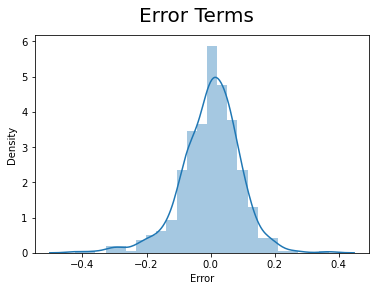

In [95]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(res,bins =25)
fig.suptitle('Error Terms',fontsize = 20)
plt.xlabel('Error',fontsize =10)

### multicollinearity test

In [96]:
calculateVIF(X_train_new)

Features   VIF
2            temp  4.60
3       windspeed  4.00
0            year  2.06
4          spring  1.65
9            Mist  1.51
5          winter  1.40
6            july  1.35
7            sept  1.20
8  Light_Snowrain  1.08
1         holiday  1.04

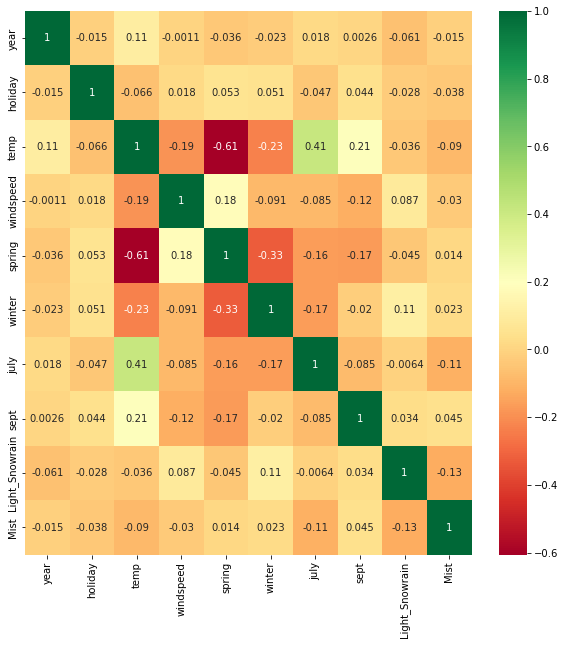

In [97]:
plt.figure(figsize = (10,10))
sns. heatmap(X_train_new.corr(), annot =True,cmap = 'RdYlGn')
plt.show()

# Step 7: Making Predictions Using the Final Model
  Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final.

In [98]:
numvar = ['atemp','temp', 'humidity', 'windspeed','cnt']
df_test[numvar] = scaler.transform(df_test[numvar])

In [99]:
df_test.describe()

year     holiday  workingday        temp       atemp    humidity  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.479452    0.036530    0.639269    0.558941    0.532991    0.638508   
std      0.500722    0.188034    0.481313    0.233698    0.217888    0.148974   
min      0.000000    0.000000    0.000000    0.046591    0.025950    0.261915   
25%      0.000000    0.000000    0.000000    0.354650    0.344751    0.527265   
50%      0.000000    0.000000    1.000000    0.558691    0.549198    0.627737   
75%      1.000000    0.000000    1.000000    0.759096    0.714132    0.743928   
max      1.000000    1.000000    1.000000    0.984424    0.980934    1.002146   

        windspeed         cnt      spring      summer  ...         oct  \
count  219.000000  219.000000  219.000000  219.000000  ...  219.000000   
mean     0.313350    0.520592    0.255708    0.264840  ...    0.082192   
std      0.159947    0.218435    0.437258    0.442259  ...    0.275286   
min     -0.042808    0.048205    0.000000    0.000000  ...    0.000000   
25%      0.198517    0.377531    0.000000    0.000000  ...    0.000000   
50%      0.299459    0.524275    0.000000    0.000000  ...    0.000000   
75%      0.403048    0.672745    1.000000    1.000000  ...    0.000000   
max      0.807474    0.963300    1.000000    1.000000  ...    1.000000   

             sept         mon         sat         sun         thu         tue  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.086758    0.118721    0.173516    0.155251    0.141553    0.123288   
std      0.282125    0.324202    0.379560    0.362974    0.349389    0.329520   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              wed  Light_Snowrain        Mist  
count  219.000000      219.000000  219.000000  
mean     0.155251        0.027397    0.319635  
std      0.362974        0.163612    0.467403  
min      0.000000        0.000000    0.000000  
25%      0.000000        0.000000    0.000000  
50%      0.000000        0.000000    0.000000  
75%      0.000000        0.000000    1.000000  
max      1.000000        1.000000    1.000000  

[8 rows x 30 columns]

In [100]:
df_test.head()

year  holiday  workingday      temp     atemp  humidity  windspeed  \
184     0        1           0  0.831783  0.769660  0.657364   0.084219   
535     1        0           1  0.901354  0.842587  0.610133   0.153728   
299     0        0           0  0.511964  0.496145  0.837699   0.334206   
221     0        0           1  0.881625  0.795343  0.437098   0.339570   
152     0        0           0  0.817246  0.741471  0.314298   0.537414   

          cnt  spring  summer  ...  oct  sept  mon  sat  sun  thu  tue  wed  \
184  0.692706       0       0  ...    0     0    0    0    0    0    0    1   
535  0.712034       0       1  ...    0     0    0    0    0    1    0    0   
299  0.303382       0       0  ...    1     0    0    1    0    0    0    0   
221  0.547400       0       0  ...    0     0    0    0    0    0    0    0   
152  0.569029       0       1  ...    0     0    0    1    0    0    0    0   

     Light_Snowrain  Mist  
184               0     1  
535               0     0  
299               0     1  
221               0     0  
152               0     0  

[5 rows x 30 columns]

###### Dividing into X_test and y_test

In [101]:
y_test = df_test.pop('cnt')
X_test = df_test

In [102]:
col = X_train_new.columns
X_test = X_test[col]

In [103]:
# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)

In [104]:
y_pred =lr_6.predict(X_test_lm6)

#  Step 8 Model Evalution

Text(0, 0.5, 'y_pred')

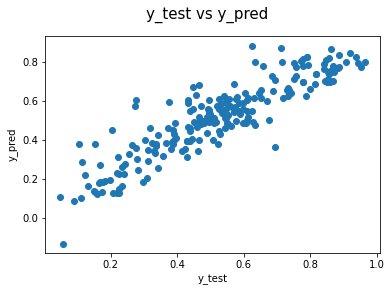

In [105]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred',fontsize = 15)
plt.xlabel('y_test',fontsize = 10)
plt.ylabel('y_pred',fontsize = 10)


In [106]:
R2 = r2_score(y_test,y_pred)
round(R2,5)

0.80701

In [107]:
adjusted_r2 = round(1-(1-R2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
adjusted_r2

0.7977

In [108]:
X_train = X_train_new.iloc[:,0].values

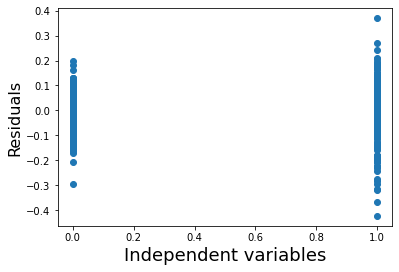

In [109]:
#PLotting the residuals to see if a pattern exists
#Checking assumption of homoscedasticity and autocorrelation
plt.figure()
plt.scatter(X_train,res)
fig.suptitle('Independent variables vs Residuals', fontsize=20)  
plt.xlabel('Independent variables', fontsize=18)   
plt.ylabel('Residuals', fontsize=16)  
plt.show()

In [110]:
lr_6.params

const             0.251899
year              0.234092
holiday          -0.098556
temp              0.451455
windspeed        -0.139817
spring           -0.110795
winter            0.047278
july             -0.072719
sept              0.057705
Light_Snowrain   -0.286408
Mist             -0.081133
dtype: float64

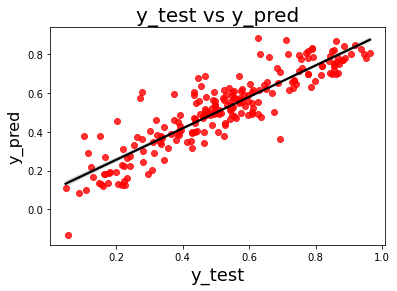

In [111]:
# Visualizing the fit on the test data
# plotting a Regression plot
plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "red"}, line_kws={"color": "black"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

###### Equation of Best fitted line 

 
###### cnt = 0.251899 + 0.234092 * year - 0.098556 * holiday + 0.451455 * temp - -0.139817 * windspeed - -0.110795 * spring + 0.047278 * winter _ 0.072719 * july + 0.057705 * sept - 0.286408 * Light_Snowrain - 0.081133 * Mist

### Demands of bike in depends  on year, holiday,temp,windspeed,spring,winter,july,sep,Light_showrain,Mist.